## Comparing theoretical and simulated firing rate of LIF neurons

In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

#%matplotlib inline

import matplotlib
import numpy as np
import scipy
import matplotlib.pyplot as plt
import numpy.random as rand
import pandas as pd
import seaborn as sns
from matplotlib import animation, rc
from IPython.display import HTML

from lib.lif import LIF, ParamsLIF, firingrate_LIF

Populating the interactive namespace from numpy and matplotlib


The analytic firing rate is given by
$$
f_i(I_i) = \left[\tau_m \int_0^\infty \frac{1}{u}e^{-u^2}(e^{2y_{th}u}-e^{2y_ru})\,du\right]^{-1}
$$
where $I_i = \sum_{j}W_{ij}s_{ij}$ and $y_{th} = \frac{1}{\sigma_i}(V_{th}-V_{rest}-I_i)$, and $y_{r} = \frac{1}{\sigma_i}(V_{r}-V_{rest}-I_i)$. For $V_{th}$ being the threshold voltage, $V_r$ the reset voltage and $V_{rest}$ the rest voltage.

In our case the the noise is also a function of parameters $W_{ij}$:
$$
\xi_i = \sum_j W_{ij}\xi_{ij}.
$$
We assume that the noise going into a given neuron $i$ is independent, but that noise between neurons can be shared. Here the variables $\xi_{ij}$ are white noise with variance $\sigma_\xi^2$. This means the overall input noise into a neuron is also white noise with variance:
$$
\sigma^2_i = \sigma_{\xi}^2 \sum_{j}W_{ij}^2.
$$

We can plot the firing rate as a function of $W_ij$ and $s_{ij}$ and compare it to simulation. We set $\tau_m = 1, V_{th} = 1, V_r = 0, V_{rest} = 0$ and $\sigma

In [19]:
N = 50
wmax = 20
smax = 5
wvals = np.linspace(-wmax, wmax, N)
svals = np.linspace(0, smax, N)
rate = np.zeros((N, N))

sigma = 10
tau = 1
mu = 1
c = 0
params_lif = ParamsLIF(sigma = sigma, tau = tau, mu = mu, c = c)

w = np.zeros(2)
s = np.zeros(2)

for i in range(N):
    for j in range(N):
        w[0] = wvals[i]
        s[0] = svals[j]
        r = firingrate_LIF(params_lif, w, s)
        if not np.isnan(r):
            rate[i,j] = r

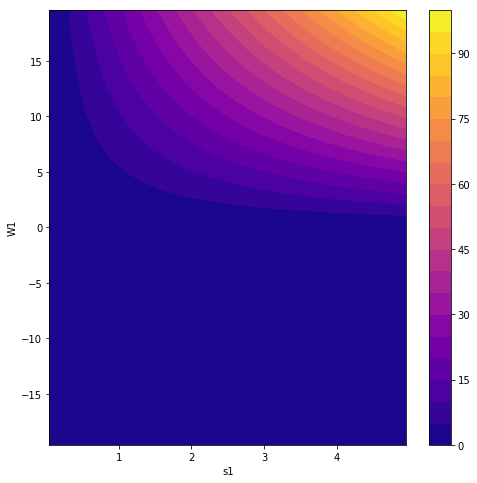

In [21]:
fig, (ax1) = plt.subplots(1,1,figsize=(8,8))
a=ax1.contourf(rate, 20, cmap='plasma', origin='lower', extent=[0, smax, -wmax, wmax])
plt.colorbar(a)
ax1.set_xlabel('s1')
ax1.set_ylabel('W1')

## Compare to simulation

In [120]:
#Create a LIF object
N = 20
wmax = 20
smax = 5
wvals = np.linspace(-wmax, wmax, N)
svals = np.linspace(0, smax, N)

mu = 1
c = 0
tau = 1
sigma = 10
tsim = 10

w1 = 10
w2 = 0
params_lif = ParamsLIF(sigma = sigma, tau = tau, mu = mu, c = c)
lif = LIF(params_lif, t = tsim)
lif.W = np.array([w1, w2])
lif.x = 0

rate_sim = np.zeros((N,N))

In [121]:
#rate_sim

In [122]:
for i in range(N):
    print i
    for j in range(N):
        lif.W[0] = wvals[i]
        lif.x = svals[j]
        (v_raw, h_raw, _, _, _) = lif.simulate()
        rate_sim[i,j] = np.sum(h_raw[0,:])/tsim

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


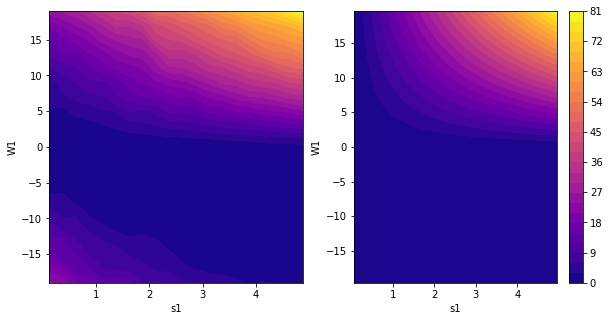

In [123]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
a=ax1.contourf(rate_sim, 30, cmap='plasma', origin='lower', extent=[0, smax, -wmax, wmax])
plt.colorbar(a)
ax1.set_xlabel('s1')
ax1.set_ylabel('W1')

a=ax2.contourf(rate, 30, cmap='plasma', origin='lower', extent=[0, smax, -wmax, wmax])
#plt.colorbar(a)
ax2.set_xlabel('s1')
ax2.set_ylabel('W1')

There are differences between the theory and sim...
Maybe down to the exclusion of refractory period in analytic result?

In [129]:
#Create a LIF object
N = 20
wmax = 20
smax = 5
wvals = np.linspace(-wmax, wmax, N)
svals = np.linspace(0, smax, N)

mu = 1
c = 0
tau = 1
sigma = 10
tsim = 10

w1 = 10
w2 = 0
params_lif = ParamsLIF(sigma = sigma, tau = tau, mu = mu, c = c, tr = 0.001, dt = 0.0002)
lif = LIF(params_lif, t = tsim)
lif.W = np.array([w1, w2])
lif.x = 0

rate_sim = np.zeros((N,N))

In [130]:
for i in range(N):
    print i
    for j in range(N):
        lif.W[0] = wvals[i]
        lif.x = svals[j]
        (v_raw, h_raw, _, _, _) = lif.simulate()
        rate_sim[i,j] = np.sum(h_raw[0,:])/tsim

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


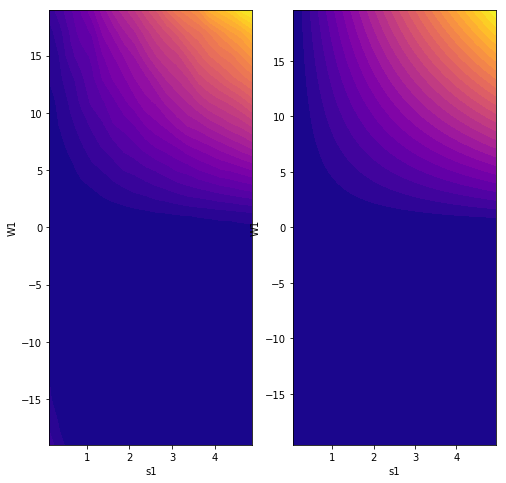

In [133]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,8))
a=ax1.contourf(rate_sim, 30, cmap='plasma', origin='lower', extent=[0, smax, -wmax, wmax])
#plt.colorbar(a)
ax1.set_xlabel('s1')
ax1.set_ylabel('W1')

a=ax2.contourf(rate, 30, cmap='plasma', origin='lower', extent=[0, smax, -wmax, wmax])
#plt.colorbar(a)
ax2.set_xlabel('s1')
ax2.set_ylabel('W1')

In [134]:
print np.max(rate)
print np.max(rate_sim)

99.4993634844
91.2


In [136]:
#plt.plot(rate.reshape((-1,1)), rate_sim.reshape((-1,1)))

A few percent off, but the form matches, so we can use this. We can precompute the firing rate function for sigma, W, and x and X.